# Temperature Data Cleaning and Calculations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
df = pd.read_csv('../../project4_big_data/temp_2020_2024/reanalysis-era5-land-timeseries-sfc-2m-temperatureiovdhfr1.csv')

In [14]:
df.head()

,valid_time,t2m,latitude,longitude
0,2020-01-01 00:00:00,248.60470,50.0,100.0
1,2020-01-01 01:00:00,248.72190,50.0,100.0
2,2020-01-01 02:00:00,249.33273,50.0,100.0
3,2020-01-01 03:00:00,252.78482,50.0,100.0
4,2020-01-01 04:00:00,256.16003,50.0,100.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valid_time  48648 non-null  object 
 1   t2m         48648 non-null  float64
 2   latitude    48648 non-null  float64
 3   longitude   48648 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [16]:
df['valid_time'].nunique()

48648

In [17]:
type(df['valid_time'][15])

str

In [18]:
df['valid_time'][2361]

'2020-04-08 09:00:00'

In [19]:
date1 = datetime.fromisoformat(df['valid_time'][2361])

date1

datetime.datetime(2020, 4, 8, 9, 0)

In [20]:
date1.year

2020

In [21]:
date1.month

4

In [22]:
date1.day

8

In [23]:
date1.hour

9

In [24]:
date1.minute

0

In [25]:
data = df

In [26]:
for i in data.index:
    date = datetime.fromisoformat(df.loc[i,'valid_time'])
    df.loc[i,'datetime'] = date
    df.loc[i,'year'] = date.year
    df.loc[i,'month'] = date.month
    df.loc[i,'day'] = date.day
    df.loc[i,'hour'] = date.hour
    df.loc[i,'temp_C'] = df.loc[i,'t2m'] - 273.15

In [27]:
df

,valid_time,t2m,latitude,longitude,datetime,year,month,day,hour,temp_C
0,2020-01-01 00:00:00,248.60470,50.0,100.0,2020-01-01 00:00:00,2020.0,1.0,1.0,0.0,-24.54530
1,2020-01-01 01:00:00,248.72190,50.0,100.0,2020-01-01 01:00:00,2020.0,1.0,1.0,1.0,-24.42810
2,2020-01-01 02:00:00,249.33273,50.0,100.0,2020-01-01 02:00:00,2020.0,1.0,1.0,2.0,-23.81727
3,2020-01-01 03:00:00,252.78482,50.0,100.0,2020-01-01 03:00:00,2020.0,1.0,1.0,3.0,-20.36518
4,2020-01-01 04:00:00,256.16003,50.0,100.0,2020-01-01 04:00:00,2020.0,1.0,1.0,4.0,-16.98997
...,...,...,...,...,...,...,...,...,...,...
48643,2025-07-19 19:00:00,288.95532,50.0,100.0,2025-07-19 19:00:00,2025.0,7.0,19.0,19.0,15.80532
48644,2025-07-19 20:00:00,288.34204,50.0,100.0,2025-07-19 20:00:00,2025.0,7.0,19.0,20.0,15.19204
48645,2025-07-19 21:00:00,287.76413,50.0,100.0,2025-07-19 21:00:00,2025.0,7.0,19.0,21.0,14.61413
48646,2025-07-19 22:00:00,287.25513,50.0,100.0,2025-07-19 22:00:00,2025.0,7.0,19.0,22.0,14.10513


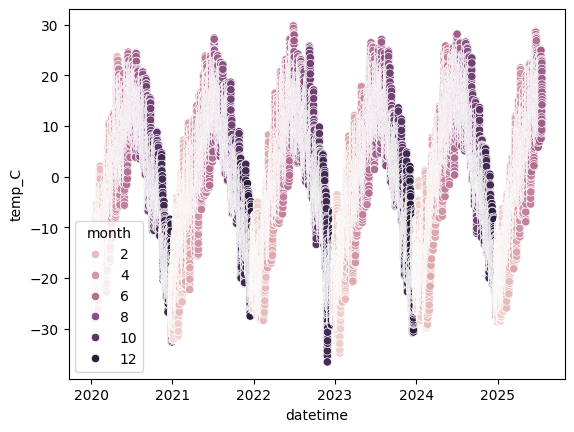

In [28]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='datetime', y='temp_C', hue='month');

In [29]:
df.loc[0:23,'temp_C'].agg(['mean', 'max', 'min'])

mean   -19.614471
max    -11.712500
min    -24.654780
Name: temp_C, dtype: float64

In [30]:
daily_temp = pd.DataFrame(columns=['date', 'mean', 'max', 'min', 'latitude', 'longitude'])

In [31]:
for n in range(0,len(df),24):
    daily_temp.loc[n/24, 'date'] = df.loc[n+6,'datetime']
    daily_temp.loc[n/24, 'mean'] = df.loc[n:n+23,'temp_C'].mean()
    daily_temp.loc[n/24, 'max'] = df.loc[n:n+23,'temp_C'].max()
    daily_temp.loc[n/24, 'min'] = df.loc[n:n+23,'temp_C'].min()
    daily_temp.loc[n/24, 'latitude'] = df.loc[n+6,'latitude']
    daily_temp.loc[n/24, 'longitude'] = df.loc[n+6, 'longitude']

In [32]:
daily_temp

,date,mean,max,min,latitude,longitude
0,2020-01-01 06:00:00,-19.614471,-11.7125,-24.65478,50.0,100.0
1,2020-01-02 06:00:00,-19.572032,-10.88248,-25.09734,50.0,100.0
2,2020-01-03 06:00:00,-19.104275,-10.18632,-24.18925,50.0,100.0
3,2020-01-04 06:00:00,-19.778983,-10.7916,-25.6949,50.0,100.0
4,2020-01-05 06:00:00,-19.351352,-10.86344,-25.65041,50.0,100.0
...,...,...,...,...,...,...
2022,2025-07-15 06:00:00,16.762815,25.00366,7.51266,50.0,100.0
2023,2025-07-16 06:00:00,16.829099,22.9545,8.6298,50.0,100.0
2024,2025-07-17 06:00:00,16.502358,23.13064,8.85104,50.0,100.0
2025,2025-07-18 06:00:00,15.816571,20.87765,9.18936,50.0,100.0


In [33]:
daily_temp.to_csv('../data/temp/temp_lat=50_long=+100.csv')

In [6]:
file_list= os.listdir('../../project4_big_data/temp_2020_2024')

file_list

['reanalysis-era5-land-timeseries-sfc-2m-temperature1mze2rpf.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature_945bo5x.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureefaqhx1y.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature4rlhwem9.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturee_um254t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemvfulk3y.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureb9slohn8.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturezrk2v1te.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0_pz1j8j.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturez4aiq9yy.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature_a1yttss.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenf8sz0wt.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesdk31lvb.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturezzkdm9bm.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0v9byqci.c

In [7]:
file_list.remove('.DS_Store')

In [8]:
len(file_list)

701

In [10]:
# set up loop
status_notes = []
file_errors = []
data_directory = '../../project4_big_data/temp_2020_2024/'

In [11]:
for file in file_list:
    # print(file)
    try:
        file_path = data_directory + file
        df = pd.read_csv(file_path)
        status_entry = {}
        lat = int(np.round(df.loc[1234,'latitude']))
        long = int(np.round(df.loc[1234,'longitude']))
        status_entry['latitude'] = lat
        status_entry['longitude'] = long
    
        # check if temperature is recorded for this file
        temp_nulls = df['t2m'].isnull().sum()
    
        if temp_nulls == 0: 
            status_entry['temp_data_present'] = f"yes"

            # format date and convert temperature to Celsius
            for i in data.index:
                date = datetime.fromisoformat(df.loc[i,'valid_time'])
                df.loc[i,'datetime'] = date
                df.loc[i,'year'] = date.year
                df.loc[i,'month'] = date.month
                df.loc[i,'day'] = date.day
                df.loc[i,'hour'] = date.hour
                df.loc[i,'temp_C'] = df.loc[i,'t2m'] - 273.15

            # construct dataframe with temperature
            daily_temp = pd.DataFrame(columns=['date', 'temp_mean', 'temp_max', 'temp_min', 'latitude', 'longitude'])

            # calculate daily average, min, and max temperatures
            for n in range(0,len(df),24):
                daily_temp.loc[n/24, 'date'] = df.loc[n+6,'datetime']
                daily_temp.loc[n/24, 'temp_mean'] = df.loc[n:n+23,'temp_C'].mean()
                daily_temp.loc[n/24, 'temp_max'] = df.loc[n:n+23,'temp_C'].max()
                daily_temp.loc[n/24, 'temp_min'] = df.loc[n:n+23,'temp_C'].min()
                daily_temp.loc[n/24, 'latitude'] = df.loc[n+6,'latitude']
                daily_temp.loc[n/24, 'longitude'] = df.loc[n+6, 'longitude']
            
            file_path = f"../data/temp/temp_lat={lat}_long={long}.csv"
            
            daily_temp.to_csv(file_path)
    
        elif temp_nulls == len(df):
            status_entry['temp_data_present'] = f"no"
    
        else:
            status_entry['temp_data_present'] = f"some: {temp_nulls} missing"
        
        status_notes.append(status_entry)
        print(lat, long, status_entry['temp_data_present'])

    except:
        print(f"Error with file: {file}")
        file_errors.append(file)

pd.DataFrame(status_notes).to_csv('../data/temp/temp_status_notes.csv')

-40 100 no
-30 160 no
50 -10 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperature4rlhwem9.csv
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperaturee_um254t.csv
40 -50 no
-40 -20 no
-10 -80 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperature0_pz1j8j.csv
10 160 no
-60 -10 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperaturenf8sz0wt.csv
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperaturesdk31lvb.csv
-10 60 no
20 70 no
-20 -40 no
80 80 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperature2d_f_wo2.csv
80 60 no
-70 -130 no
-50 -30 no
-50 100 no
20 -20 no
-61 -180 no
-40 70 no
0 0 no
30 170 no
30 -120 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperatureob3k65l0.csv
-50 120 no
-50 -40 no
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperatureotocuxzx.csv
Error with file: reanalysis-era5-land-timeseries-sfc-2m-temperature0rxh71rk.csv
Error with file: reanalysis-era

In [12]:
file_errors

['reanalysis-era5-land-timeseries-sfc-2m-temperature4rlhwem9.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturee_um254t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0_pz1j8j.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenf8sz0wt.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesdk31lvb.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2d_f_wo2.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureob3k65l0.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureotocuxzx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0rxh71rk.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0w9gy8vj.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturelo55k72e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureum75955t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehmbfyqck.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturexarc3sie.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureo5qa8ck5.c

In [2]:
new_file_list = ['reanalysis-era5-land-timeseries-sfc-2m-temperature4rlhwem9.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturee_um254t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0_pz1j8j.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenf8sz0wt.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesdk31lvb.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2d_f_wo2.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureob3k65l0.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureotocuxzx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0rxh71rk.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0w9gy8vj.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturelo55k72e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureum75955t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehmbfyqck.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturexarc3sie.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureo5qa8ck5.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturexrzdvcfm.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturevvvv2tuh.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2i3pvhbn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturegj494d7e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturerayu1641.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureiovdhfr1.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturedh9rykw4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureu8uivln7.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturea01rtk06.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturejfa7ghe3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature8iarwtq3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature57ecne1q.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturevv4r1qf6.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturezo6ofzja.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatures_177lhq.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturercewtv7e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenhk0b2xn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5pa133xd.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0k7h555m.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturebq605u62.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature4tnrd7j8.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature3mqjk8q9.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature6zobpso1.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturebcvj6oun.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureiohpaqs0.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturearkzzcph.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureenn3guwx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesg5jo7m7.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturee6cgkzry.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturec2zjpfic.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9jn8kz6q.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturebatcg4en.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturel2c8mstx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0j323rws.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureaq3w4mpp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature_pljksqj.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureuwrbup6r.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureit9pn99m.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureer4q2mk3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureob3k65l0 2.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureq7cna70t.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureyy3t62uh.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature1mwr2u4e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureo35qf7v7.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureo6phsx6s.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturefbvwlx0z.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturefeyytdcp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureybdyw2_v.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturecw8vhzr6.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturen0qjydjy.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureuhfsnr3h.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureunn0ccxv.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenuudzfol.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5d9jcpqm.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureeqoupt_e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesvtrq2l3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturej__wz4sg.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehr718073.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5iezhjsy.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0l20e9mf.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturef2q0puv_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturel3hh1r2f.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature4m4rqytp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureodholvs4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturecheixrja.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturec_vxh7_w.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemv8dbf12.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturev2d8miq_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2gww0i3b.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureahkvzq7y.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemak6y6lz.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureaccrgd3r.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturerrjwuhyo.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature7ttecj_h.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature1q30s0vc.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturef3yj17cj.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature1j0lmujp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturem0vail47.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturep2qzs9dp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatured9h1k8rv.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturekol679ff.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureay9_4obd.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature8oe33o4f.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9inmopvr.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturey7wymc94.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature3l3kl730.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureq83e_wvn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturebuu153il.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturez6khxbvw.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturecc51un_l.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature28xzld79.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturejda397he.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureky1oz17a.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturep4wg2mgo.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatures09tl0e3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureww5uzked.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturey0b1s086.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturew4ooh4f_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturew6gsl1ai.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureoduv14hu.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature19npwxpo.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature70jelxhk.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature3l_697j9.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature1rrb7w7s.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureitdq1cwi.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturerbspg7q3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturex6kf9f6n.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehdj5h0qv.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturej3rmur03.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturen7k3ztvp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturent3nsrbb.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturez5zugikd.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesld7fz8p.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatures9_1r8s4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureqx2la2oi.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturetkjgo39_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturei9wvtysr.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturecdab8xc7.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature53csbd3c.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturedk0vh2wl.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureqfrgtryz.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturentriq0rt.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5jgiilxs.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureksdoauy3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9lw2cqhn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturejb6grhqv.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturevspdlrk4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemdj6zvkf.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature8kynf8j_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehl8acgat.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9p2wq8cp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturej0bfag49.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemz5_6qiy.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturey59yrqxa.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0uv4yvjp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturepu4ojrjs.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturew39onb6f.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature7gyl_rsk.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureczdx5oxh.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureuuju54r4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature7m0nvnne.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturee8cxljw6.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureanasa93v.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5wu_3061.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturezjmeuvsx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature720m8a1n.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureor9b6ruf.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureymdxps9o.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturexx6w3eni.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturevxwwyvco.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureszqemf5v.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturekjl6m0de.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturea8b_8n2l.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturerouo3gpv.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0zmj572c.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature1__nkh0_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureylncsp5h.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturel2rmocng.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5cesyc3h.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureozcnhgr5.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturewpj4hyrd.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0bdennvy.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturem5o9lxi5.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2q15lusb.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2lgypmnn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemhq4p_lu.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5yxspvp_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureq2__2gfx.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature838jk_ua.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatures6gmq8w7.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturelgnfc4yu.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9a815t3v.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5gz94qhj.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturel179z1in.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2b6mrxtm.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureg32qrq_y.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturetkrur0sq.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature51g7iwic.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature4h08_nhr.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturejda_wj0l.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2izyk6b4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturesce65xhs.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturergxkyu8z.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature_o0_qhdg.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureep11bour.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureh2qzex2w.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureqoo_kh4n.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturekfi29497.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehtc0hh7j.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature7_hgimw3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturenl65qc90.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturekqvwya91.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureyrpd0qg6.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehz493fm_.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturedy9yulqu.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturev375hflc.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturedfpkgljz.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturejyz32lo3.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9lu29m2b.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureli4w12ml.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature4505kd3f.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature5yppa0u4.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturevmlhiywn.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturex05zk9fq.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9da_pb0h.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturebedcsspq.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperatureejef4b8e.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature3w14_8wp.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature0d_vu_g6.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature6taupygk.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturehe4a8nob.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature2izyk6b4 2.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperaturemo2n33d1.csv',
 'reanalysis-era5-land-timeseries-sfc-2m-temperature9yjsfil9.csv']

In [4]:
# set up loop
status_notes = []
file_errors = []
data_directory = '../../project4_big_data/temp_2020_2024/'

In [7]:
for file in new_file_list:
    # print(file)
    #try:
    file_path = data_directory + file
    df = pd.read_csv(file_path)
    status_entry = {}
    lat = int(np.round(df.loc[1234,'latitude']))
    long = int(np.round(df.loc[1234,'longitude']))
    status_entry['latitude'] = lat
    status_entry['longitude'] = long
    
    # check if temperature is recorded for this file
    temp_nulls = df['t2m'].isnull().sum()
    
    if temp_nulls == 0: 
        status_entry['temp_data_present'] = f"yes"

            # format date and convert temperature to Celsius
        for i in df.index:
            date = datetime.fromisoformat(df.loc[i,'valid_time'])
            df.loc[i,'datetime'] = date
            df.loc[i,'year'] = date.year
            df.loc[i,'month'] = date.month
            df.loc[i,'day'] = date.day
            df.loc[i,'hour'] = date.hour
            df.loc[i,'temp_C'] = df.loc[i,'t2m'] - 273.15

            # construct dataframe with temperature
        daily_temp = pd.DataFrame(columns=['date', 'temp_mean', 'temp_max', 'temp_min', 'latitude', 'longitude'])

            # calculate daily average, min, and max temperatures
        for n in range(0,len(df),24):
            daily_temp.loc[n/24, 'date'] = df.loc[n+6,'datetime']
            daily_temp.loc[n/24, 'temp_mean'] = df.loc[n:n+23,'temp_C'].mean()
            daily_temp.loc[n/24, 'temp_max'] = df.loc[n:n+23,'temp_C'].max()
            daily_temp.loc[n/24, 'temp_min'] = df.loc[n:n+23,'temp_C'].min()
            daily_temp.loc[n/24, 'latitude'] = df.loc[n+6,'latitude']
            daily_temp.loc[n/24, 'longitude'] = df.loc[n+6, 'longitude']
            
        file_path = f"../data/temp/temp_lat={lat}_long={long}.csv"
            
        daily_temp.to_csv(file_path)
    
    elif temp_nulls == len(df):
        status_entry['temp_data_present'] = f"no"
    
    else:
        status_entry['temp_data_present'] = f"some: {temp_nulls} missing"
        
    status_notes.append(status_entry)
    print(lat, long, status_entry['temp_data_present'])

#    except:
#        print(f"Error with file: {file}")
#        file_errors.append(file)

#pd.DataFrame(status_notes).to_csv('../data/temp/temp_status_notes.csv')

70 130 yes
-80 -100 yes
60 10 yes
-80 -70 yes
-80 80 yes
-30 150 yes
52 0 yes
40 -90 yes
30 20 yes
-80 -140 yes
-80 160 yes
60 40 yes
50 70 yes
40 40 yes
-88 -180 yes
80 -90 yes
30 100 yes
50 130 yes
-70 40 yes
40 20 yes
50 100 yes
70 80 yes
-70 -70 yes
-70 120 yes
70 -40 yes
-70 70 yes
-80 -175 yes
-80 -170 yes
30 40 yes
80 -20 yes
80 -100 yes
-30 30 yes
-80 -90 yes
-80 170 yes
0 100 yes
52 0 yes
-80 -160 yes
70 -30 yes
-89 -180 yes
20 20 yes
-70 140 yes
0 20 yes
60 60 yes
-70 30 yes
70 -70 yes
30 10 yes
30 0 yes
-80 -80 yes
20 80 yes
60 80 yes
10 10 yes
60 100 yes
-10 -60 yes
30 80 yes
52 0 yes
40 0 yes
-78 -180 yes
-30 -70 yes
-70 100 yes
20 50 yes
20 30 yes
40 110 yes
40 90 yes
30 -100 yes
60 -70 yes
70 -150 yes
-20 140 yes
-80 -50 yes
80 20 yes
40 30 yes
20 -90 yes
30 90 yes
-30 130 yes
10 20 yes
-70 130 yes
-80 -120 yes
-10 30 yes
-80 -130 yes
-80 -40 yes
-40 -70 yes
50 10 yes
10 50 yes
-81 -180 yes
60 -160 yes
-80 140 yes
-10 -40 yes
60 -100 yes
-30 140 yes
-80 100 yes
-80 -150 